# Regression Data Set for ToyotaCorolla

## Data in-set and Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler
from termcolor import colored
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import seaborn as sns

def prRed(skk): print("\033[1m \033[91m {}\033[00m" .format(skk)) 
def prGreen(skk): print("\033[1m \033[92m {}\033[00m" .format(skk)) 
def prYellow(skk): print("\033[1m \033[93m {}\033[00m" .format(skk)) 
def prBlack(skk): print("\033[1m \033[98m {}\033[00m" .format(skk)) 

In [3]:
corolla = pd.read_csv('ToyotaCorolla_kaggle.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,NaN,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,NaN,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


##### NULL VALUES
We have null values in these columns - 'HP' , 'cc' , 'Doors', 'Cylinders', 'Gears', 'Weight'. )

In [4]:
corolla.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
Id                  1436 non-null int64
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1366 non-null float64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1385 non-null float64
Doors               1424 non-null float64
Cylinders           1398 non-null float64
Gears               1418 non-null float64
Quarterly_Tax       1436 non-null int64
Weight              1431 non-null float64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64

##### To impute null values, best categorical column to groupby would be 'Fuel_type'

In [5]:
g_corolla = corolla.groupby(['Fuel_Type'])
g_corolla.first()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Fuel_Type,,,,,,,,,,,,,,,,,,,,,
CNG,191,TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-...,7750,43,2,2001,178858,110.0,0,0,...,0,0,1,1,0,0,1,0,1,0
Diesel,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90.0,1,0,...,1,1,1,0,0,0,1,0,0,0
Petrol,9,?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,192.0,0,0,...,1,1,1,1,0,0,0,1,1,0


In [6]:
g1_corolla = g_corolla.transform(lambda grp: grp.fillna(grp.mean()))

In [7]:
g1_corolla

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,78.306452,1,0,2000.0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,78.306452,1,0,2000.0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,90.000000,1,0,2000.0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,2002,48000,90.000000,0,0,2000.0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,2002,38500,90.000000,0,0,2000.0,...,1,1,1,0,1,0,1,0,0,0
5,6,12950,32,1,2002,61000,90.000000,0,0,2000.0,...,1,1,1,0,1,0,1,0,0,0
6,7,16900,27,6,2002,94612,90.000000,1,0,2000.0,...,1,1,1,0,0,1,1,0,0,0
7,8,18600,30,3,2002,75889,78.306452,1,0,2000.0,...,1,1,1,0,0,0,1,0,0,0
8,9,21500,27,6,2002,19700,192.000000,0,0,1800.0,...,1,1,1,1,0,0,0,1,1,0
9,10,12950,23,10,2002,71138,69.000000,0,0,1900.0,...,0,0,1,0,0,0,1,0,0,0


##### Group transformation with mean values in the above 6 columns

In [8]:
g1_corolla['HP']=(g_corolla['HP'].apply(lambda grp:grp.fillna(grp.mean())))

In [9]:
g1_corolla['cc']=(g_corolla['cc'].apply(lambda grp:grp.fillna(grp.mean())))


In [10]:
g1_corolla['Doors']=(g_corolla['Doors'].apply(lambda grp:grp.fillna(grp.median())))


In [11]:
g1_corolla['Cylinders']=(g_corolla['Cylinders'].apply(lambda grp:grp.fillna(grp.median())))


In [12]:
g1_corolla['Gears']=(g_corolla['Gears'].apply(lambda grp:grp.fillna(grp.median())))


In [13]:
g1_corolla['Weight']=(g_corolla['Weight'].apply(lambda grp:grp.fillna(grp.mean())))


In [14]:

#del(g1_corolla)

In [15]:
#cor_dum = pd.get_dummies(g1_corolla['Fuel_Type'])
g1_corolla= pd.concat([g1_corolla,corolla['Fuel_Type']], axis=1)


In [16]:
g1_corolla = pd.get_dummies(g1_corolla)

In [17]:
y1 = g1_corolla['Price']

In [18]:
g1_corolla.drop('Price', axis=1, inplace=True) #Since it's target variable

In [19]:
g1_corolla.head()

,Id,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,23,10,2002,46986,78.306452,1,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
1,2,23,10,2002,72937,78.306452,1,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
2,3,24,9,2002,41711,90.000000,1,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
3,4,26,7,2002,48000,90.000000,0,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
4,5,30,3,2002,38500,90.000000,0,0,2000.0,3.0,...,0,1,0,1,0,0,0,0,1,0


In [20]:
#Selected Standardscaler because of high variance and size of the data

In [21]:
X_train_org, X_test_org, y_train, y_test = train_test_split(g1_corolla,y1,test_size=0.25, random_state=0)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [23]:
mm = MinMaxScaler()
X_train1 = mm.fit_transform(X_train_org)
X_test1  = mm.transform(X_test_org)

### REGRESSION MODELS


#####  LINEAR REGRESSION

In [24]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

prRed("\nLINEAR REGRESSION")
lreg_score_train = lreg.score(X_train, y_train)
lreg_score_test = lreg.score(X_test, y_test)
print("\nTrain score -->",lreg_score_train)
print("Test score  -->",lreg_score_test)
y_pred_test = lreg.predict(X_test)
rmse_lreg = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE LREG   -->",rmse_lreg)

  
LINEAR REGRESSION

Train score --> 0.9228604311699188
Test score  --> 0.8622480043043221
RMSE LREG   --> 1595972.3174654162


Data is linearly correlated!


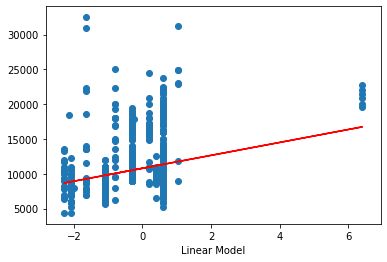

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Linear Model')
print("Data is linearly correlated!")


##### RIDGE REGRESSION

In [26]:
#RIDGE
ridge_params = {'alpha':[0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]}
#We can build Grid Search model using the above parameters. 

grid_search = GridSearchCV(linear_model.Ridge(random_state=0), ridge_params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
prRed("\nRIDGE REGRESSION")
print("\nBest tuning parameter from grid search -->" ,grid_search.best_params_)

ridge_score_train = grid_search.score(X_train,y_train)
ridge_score_test = grid_search.score(X_test,y_test)
print("\nTrain score -->", ridge_score_train)
print("Test score  -->", )
y_pred_test = grid_search.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE RIDGE  -->",rmse_ridge)
#Cross validation for mean score
for alpha in [0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(grid_search,X_train,y_train,cv=5))
    test_scores.append(cross_val_score(grid_search,X_test,y_test,cv=5))
prRed('\nRIDGE CROSS VALIDATION')   
print("\nMean Train score -->",np.mean(train_scores))
print("Mean Test score  -->",np.mean(test_scores))

  
RIDGE REGRESSION

Best tuning parameter from grid search --> {'alpha': 15}

Train score --> 0.9222947655705667
Test score  -->
RMSE RIDGE  --> 1613772.962108371


C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_s

  
RIDGE CROSS VALIDATION

Mean Train score --> 0.9010670949399916
Mean Test score  --> 0.8535671070335216


#####  LASSO REGRESSION

In [27]:
#LASSO
lasso_params = {'alpha':[0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]}
#We can build Grid Search model using the above parameters. 

grid_search = GridSearchCV(linear_model.Lasso(random_state=0), lasso_params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
prGreen("\nLASSO REGRESSION")
print("Best tuning parameter from grid search -->" ,grid_search.best_params_)

lasso_score_train = grid_search.score(X_train,y_train) 
lasso_score_test = grid_search.score(X_test,y_test)
print("\nTrain score -->",lasso_score_train)
print("Test score  -->", lasso_score_test)
y_pred_test = grid_search.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE LASSO  -->",rmse_ridge)
#Cross validation for mean score
for alpha in [0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(grid_search,X_train,y_train,cv=5))
    test_scores.append(cross_val_score(grid_search,X_test,y_test,cv=5))
prGreen("\nLASSO CROSS VALIDATION")      
print("\nMean Train score -->",np.mean(train_scores))
print("Mean Test score  -->",np.mean(test_scores))

  
LASSO REGRESSION
Best tuning parameter from grid search --> {'alpha': 5}

Train score --> 0.9226428967793625
Test score  --> 0.860757792483764
RMSE LASSO  --> 1613772.962108371


C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_s

  
LASSO CROSS VALIDATION

Mean Train score --> 0.8998172613695115
Mean Test score  --> 0.8539788579820204




##### POLYNOMIAL REGRESSION


In [28]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
param_grid = {'polynomialfeatures__degree': np.arange(4), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5)
poly_grid.fit(X_train, y_train)

print("Best degree -->",poly_grid.best_params_['polynomialfeatures__degree'])
print("Best score -->",poly_grid.best_score_)

    

Best degree --> 1
Best score --> 0.8995403246698338


C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
poly_score_train = poly_grid.score(X_train,y_train)
poly_score_test = poly_grid.score(X_test,y_test)

print("Train",poly_score_train)
print("Test", poly_score_test)

Train 0.922858607030291
Test 0.8622619102629613


In [30]:
y_pred_poly_test = poly_grid.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_pred_poly_test, y_test)**2)
print("RMSE POLY  -->",rmse_poly)

RMSE POLY  --> 1595811.2052802613


In [31]:
poly_train_score = []
poly_test_score =[]
poly_train_score.append(cross_val_score(poly_grid,X_train,y_train,cv=5))


C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_s

In [32]:
poly_test_score.append(cross_val_score(poly_grid,X_test,y_test,cv=5))

C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_s

In [33]:
prRed("\nPOLYNOMIAL CROSS VALIDATION")      
print("\nMean Train score -->",np.mean(poly_train_score))
print("Mean Test score  -->",np.mean(poly_test_score))

  
POLYNOMIAL CROSS VALIDATION

Mean Train score --> 0.5633664177420235
Mean Test score  --> -7.507644367065166e+16



##### KNN Regressor

In [34]:
k_range = list(range(1,10))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range)
#print (param_grid)
knn = KNeighborsRegressor()

grid = GridSearchCV(knn, param_grid, cv = 5)
grid.fit(X_train,y_train)
print (grid.best_params_)
print (grid.best_estimator_)

knn_reg = KNeighborsRegressor(grid.best_params_['n_neighbors'])
knn_reg.fit(X_train, y_train)
knn_reg_train_score=knn_reg.score(X_train, y_train)
knn_reg_test_score= knn_reg.score(X_test, y_test)
y_pred_test = knn_reg.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE kNN Regressor  -->",rmse_knn)
for k in k_range:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(KNeighborsRegressor(k),X_train,y_train,cv=5))
    test_scores.append(cross_val_score(KNeighborsRegressor(k),X_test,y_test,cv=5))
prRed("\nkNN REGRESSOR CROSS VALIDATION")      
print("\nMean Train score -->",np.mean(train_scores))
print("Mean Test score  -->",np.mean(test_scores))

{'n_neighbors': 5}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
RMSE kNN Regressor  --> 2105639.037325905
  
kNN REGRESSOR CROSS VALIDATION

Mean Train score --> 0.850186445023709
Mean Test score  --> 0.7247807057226522


##### SUPPORT VECTOR REGRESSION

In [35]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'kernel':('linear', 'rbf','poly')}

In [36]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\Shrishti Narle\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [37]:
prRed("\nSUPPORT VECTOR REGRESSION")
print("Best parameters: {}".format(grid_search.best_params_))
svm_score_train = grid_search.score(X_train,y_train)
svm_score_test = grid_search.score(X_test,y_test)

print("\nTrain score   -->" ,svm_score_train )
print("Test score    -->", svm_score_test)
y_pred_test = grid_search.predict(X_test)
rmse_svm = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE SVM Reg  -->",rmse_svm)

  
SUPPORT VECTOR REGRESSION
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}

Train score   --> 0.9178746679390967
Test score    --> 0.8452259609878063
RMSE SVM Reg  --> 1793186.9551384198


In [38]:
Models1= [('Linear ', lreg_score_train, lreg_score_test, rmse_lreg),
          ('Ridge ', ridge_score_train, ridge_score_test, rmse_ridge),
          ('Lasso ', lasso_score_train, lasso_score_test, rmse_lasso),
          ('Polynomial ', poly_score_train, poly_score_test, rmse_poly),
          ('kNN ', knn_reg_train_score, knn_reg_test_score, rmse_knn),
          ('SVM ', svm_score_train, svm_score_test, rmse_svm)]

In [39]:
stats = pd.DataFrame(data = Models1, columns = ['Models', 'Score_Train', 'Score_Test', 'RMSE'])
print("\n",stats)




         Models  Score_Train  Score_Test          RMSE
0      Linear      0.922860    0.862248  1.595972e+06
1       Ridge      0.922295    0.860712  1.613773e+06
2       Lasso      0.922643    0.860758  1.613238e+06
3  Polynomial      0.922859    0.862262  1.595811e+06
4         kNN      0.907167    0.818258  2.105639e+06
5         SVM      0.917875    0.845226  1.793187e+06


In [40]:
prGreen(stats.loc[stats['Score_Test'].idxmax()])

  Models         Polynomial 
Score_Train       0.922859
Score_Test        0.862262
RMSE           1.59581e+06
Name: 3, dtype: object


(0, 1.0)

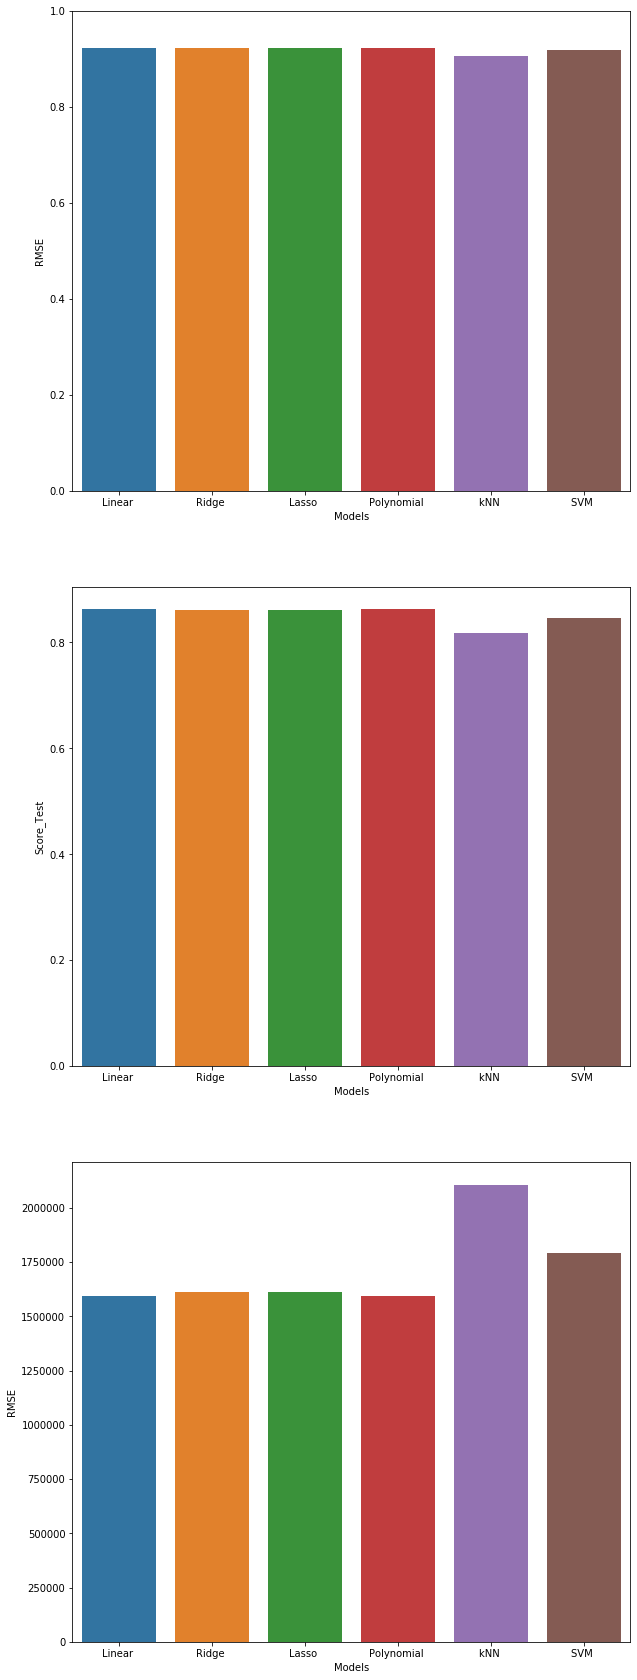

In [41]:
f, axes = plt.subplots(3,1, figsize=(10, 30))
sns.barplot(x='Models', y='Score_Train', data = stats, ax = axes[0])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score_Train')
axes[0].set_ylim(0,1.0)

sns.barplot(x='Models', y='Score_Test', data = stats, ax = axes[1])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score_Test')
axes[0].set_ylim(0,1.0)

sns.barplot(x='Models', y='RMSE', data = stats, ax = axes[2])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_ylim(0,1.0)

In [42]:
from IPython.display import display, Javascript
display(Javascript("""
require(
    ["base/js/dialog"], 
    function(dialog) {
        dialog.modal({
            title: 'Project_1_Regression Summary',
            body: 'Looking at the RMSE scores plot, Best model is Linear Regression with test predictin score of 0.86227',
            buttons: {
                'Best Model is Linear': {}
            }
        });
    })
"""))

<IPython.core.display.Javascript object>

# Classification Data Set for Airline Passenger Satisfaction

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
train=pd.read_csv("Atrain.csv")
test=pd.read_csv("Atest.csv")

In [45]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4.0,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2.0,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2.0,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5.0,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3.0,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [46]:
test.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [47]:
train.columns.values
test.columns.values

array(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'], dtype=object)

In [48]:
train.shape

(103904, 25)

In [49]:
test.shape


(25976, 25)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
Unnamed: 0                           103904 non-null int64
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103901 non-null float64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int6

In [51]:
train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [52]:
test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [53]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4.0,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2.0,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2.0,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5.0,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3.0,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [54]:
train = train.sample(frac=0.1, replace=False, random_state=1)

In [55]:
train.shape

(10390, 24)

In [56]:
test = test.sample(frac=0.1, replace=False, random_state=1)

In [57]:
test.shape

(2598, 24)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10390 entries, 65830 to 102919
Data columns (total 24 columns):
id                                   10390 non-null int64
Gender                               10390 non-null object
Customer Type                        10390 non-null object
Age                                  10390 non-null int64
Type of Travel                       10390 non-null object
Class                                10390 non-null object
Flight Distance                      10390 non-null int64
Inflight wifi service                10390 non-null int64
Departure/Arrival time convenient    10389 non-null float64
Ease of Online booking               10390 non-null int64
Gate location                        10390 non-null int64
Food and drink                       10390 non-null int64
Online boarding                      10390 non-null int64
Seat comfort                         10390 non-null int64
Inflight entertainment               10390 non-null int64
On-board s

In [59]:
train['Arrival Delay in Minutes']=train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].mean())
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10390 entries, 65830 to 102919
Data columns (total 24 columns):
id                                   10390 non-null int64
Gender                               10390 non-null object
Customer Type                        10390 non-null object
Age                                  10390 non-null int64
Type of Travel                       10390 non-null object
Class                                10390 non-null object
Flight Distance                      10390 non-null int64
Inflight wifi service                10390 non-null int64
Departure/Arrival time convenient    10389 non-null float64
Ease of Online booking               10390 non-null int64
Gate location                        10390 non-null int64
Food and drink                       10390 non-null int64
Online boarding                      10390 non-null int64
Seat comfort                         10390 non-null int64
Inflight entertainment               10390 non-null int64
On-board s

In [60]:
train['Departure/Arrival time convenient'].replace(' ', np.nan)
train['Departure/Arrival time convenient']=train['Departure/Arrival time convenient'].fillna(train['Departure/Arrival time convenient'].mean())
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10390 entries, 65830 to 102919
Data columns (total 24 columns):
id                                   10390 non-null int64
Gender                               10390 non-null object
Customer Type                        10390 non-null object
Age                                  10390 non-null int64
Type of Travel                       10390 non-null object
Class                                10390 non-null object
Flight Distance                      10390 non-null int64
Inflight wifi service                10390 non-null int64
Departure/Arrival time convenient    10390 non-null float64
Ease of Online booking               10390 non-null int64
Gate location                        10390 non-null int64
Food and drink                       10390 non-null int64
Online boarding                      10390 non-null int64
Seat comfort                         10390 non-null int64
Inflight entertainment               10390 non-null int64
On-board s

In [61]:
test['Arrival Delay in Minutes']= test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].mean())

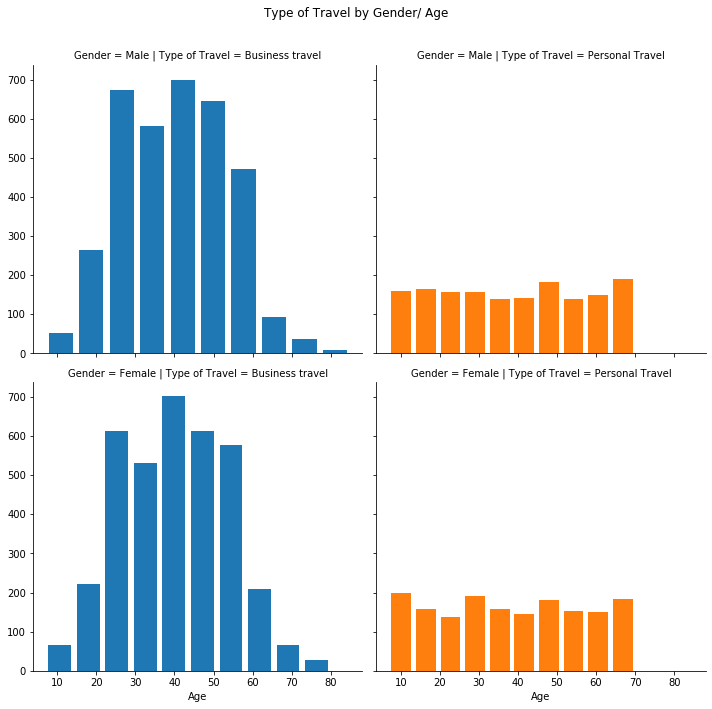

In [62]:
b = sns.FacetGrid(train, height = 5, row = 'Gender', col = 'Type of Travel', hue = 'Type of Travel')
b.map(plt.hist, 'Age', rwidth = 0.8)
b.fig.suptitle('Type of Travel by Gender/ Age')
plt.subplots_adjust(top = 0.90)

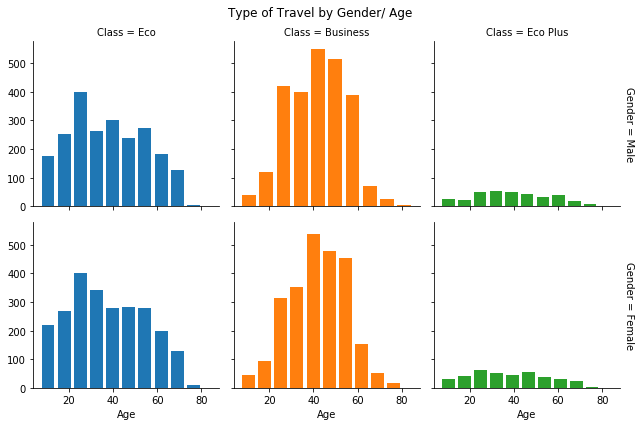

In [63]:
a = sns.FacetGrid(train, height = 3, row = 'Gender', col = 'Class', hue = 'Class', margin_titles = True)
a.map(plt.hist, 'Age', rwidth = 0.8)
a.fig.suptitle('Type of Travel by Gender/ Age')
plt.subplots_adjust(top = 0.90)

In [64]:
train.describe(include=['O'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,10390,10390,10390,10390,10390
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,5285,8533,7152,5032,5974


In [65]:
train[train['Gender']=='Female'].count()

id                                   5285
Gender                               5285
Customer Type                        5285
Age                                  5285
Type of Travel                       5285
Class                                5285
Flight Distance                      5285
Inflight wifi service                5285
Departure/Arrival time convenient    5285
Ease of Online booking               5285
Gate location                        5285
Food and drink                       5285
Online boarding                      5285
Seat comfort                         5285
Inflight entertainment               5285
On-board service                     5285
Leg room service                     5285
Baggage handling                     5285
Checkin service                      5285
Inflight service                     5285
Cleanliness                          5285
Departure Delay in Minutes           5285
Arrival Delay in Minutes             5285
satisfaction                      

In [66]:
train['Gender']=train['Gender'].map({'Female': 1, 'Male': 0}).astype(int)

test['Gender']=test['Gender'].map({'Female': 1, 'Male': 0}).astype(int)

In [67]:
print(train['Customer Type'].unique())
train[train['Customer Type']=='Loyal Customer'].count()
train['Customer Type']=train['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})

print(test['Customer Type'].unique())
test[test['Customer Type']=='Loyal Customer'].count()
test['Customer Type']=test['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})

['Loyal Customer' 'disloyal Customer']
['Loyal Customer' 'disloyal Customer']


In [68]:
print(train['Type of Travel'].unique())
train[train['Type of Travel']=='Personal Travel'].count()
train['Type of Travel']=train['Type of Travel'].map({'Business travel':1,'Personal Travel':0})

test['Type of Travel']=test['Type of Travel'].map({'Business travel':1,'Personal Travel':0})

['Business travel' 'Personal Travel']


In [69]:
train['Class'].unique()
F= pd.get_dummies(train['Class'])
train= pd.concat([train,F], axis=1)
train.drop('Class', axis=1, inplace=True)
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
65830,23509,0,1,41,1,303,5,3.0,3,3,...,3,5,5,5,0,0.0,satisfied,0,1,0
41026,31011,1,1,18,1,391,1,5.0,5,5,...,3,1,4,1,17,17.0,neutral or dissatisfied,1,0,0
95867,29345,1,1,13,0,569,2,4.0,2,3,...,4,5,5,1,0,0.0,neutral or dissatisfied,0,0,1
75679,50242,0,0,23,1,109,1,0.0,1,1,...,5,3,1,3,0,0.0,neutral or dissatisfied,0,1,0
52958,22244,0,1,23,0,83,4,5.0,0,3,...,4,3,5,5,0,0.0,neutral or dissatisfied,1,0,0


In [70]:
test['Class'].unique()
F= pd.get_dummies(test['Class'])
test= pd.concat([test,F], axis=1)
test.drop('Class', axis=1, inplace=True)
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
21362,55974,1,1,69,0,1620,3,5,3.0,1,...,4,5,4,4,0,0.0,neutral or dissatisfied,0,1,0
11437,77109,0,0,35,1,1481,2,2,2.0,3,...,5,5,4,3,0,0.0,neutral or dissatisfied,1,0,0
11025,107163,0,1,39,1,402,5,5,5.0,5,...,5,4,5,3,3,1.0,satisfied,1,0,0
14165,67017,1,0,29,1,985,2,2,2.0,2,...,4,3,5,4,29,20.0,neutral or dissatisfied,1,0,0
16249,47670,1,0,27,1,1211,2,2,2.0,3,...,3,1,4,2,0,0.0,neutral or dissatisfied,0,1,0


In [71]:
train[train['satisfaction']=='neutral or dissatisfied'].count()
train['satisfaction']=train['satisfaction'].map({'neutral or dissatisfied':1, 'satisfied':0})
test['satisfaction']=test['satisfaction'].map({'neutral or dissatisfied':1, 'satisfied':0})

In [72]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [73]:
test.head()
#train.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
21362,1,1,69,0,1620,3,5,3.0,1,2,...,4,5,4,4,0,0.0,1,0,1,0
11437,0,0,35,1,1481,2,2,2.0,3,3,...,5,5,4,3,0,0.0,1,1,0,0
11025,0,1,39,1,402,5,5,5.0,5,5,...,5,4,5,3,3,1.0,0,1,0,0
14165,1,0,29,1,985,2,2,2.0,2,4,...,4,3,5,4,29,20.0,1,1,0,0
16249,1,0,27,1,1211,2,2,2.0,3,2,...,3,1,4,2,0,0.0,1,0,1,0


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 21362 to 15454
Data columns (total 25 columns):
Gender                               2598 non-null int32
Customer Type                        2598 non-null int64
Age                                  2598 non-null int64
Type of Travel                       2598 non-null int64
Flight Distance                      2598 non-null int64
Inflight wifi service                2598 non-null int64
Departure/Arrival time convenient    2598 non-null int64
Ease of Online booking               2598 non-null float64
Gate location                        2598 non-null int64
Food and drink                       2598 non-null int64
Online boarding                      2598 non-null int64
Seat comfort                         2598 non-null int64
Inflight entertainment               2598 non-null int64
On-board service                     2598 non-null int64
Leg room service                     2598 non-null int64
Baggage handling               

Text(0.5, 1.0, 'Flight Distance Distribution')

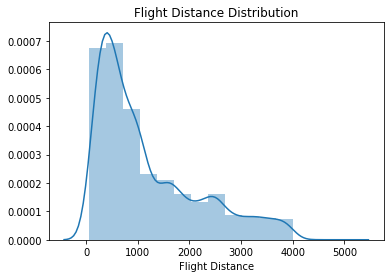

In [75]:

x = train['Flight Distance']
sns.distplot(x, bins = 15)
plt.title('Flight Distance Distribution')

In [76]:
df=pd.concat([train, test])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12988 entries, 65830 to 15454
Data columns (total 25 columns):
Gender                               12988 non-null int32
Customer Type                        12988 non-null int64
Age                                  12988 non-null int64
Type of Travel                       12988 non-null int64
Flight Distance                      12988 non-null int64
Inflight wifi service                12988 non-null int64
Departure/Arrival time convenient    12988 non-null float64
Ease of Online booking               12988 non-null float64
Gate location                        12988 non-null int64
Food and drink                       12988 non-null int64
Online boarding                      12988 non-null int64
Seat comfort                         12988 non-null int64
Inflight entertainment               12988 non-null int64
On-board service                     12988 non-null int64
Leg room service                     12988 non-null int64
Baggage handl

In [78]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
65830,0,1,41,1,303,5,3.0,3.0,3,5,...,3,5,5,5,0,0.0,0,0,1,0
41026,1,1,18,1,391,1,5.0,5.0,5,1,...,3,1,4,1,17,17.0,1,1,0,0
95867,1,1,13,0,569,2,4.0,2.0,3,1,...,4,5,5,1,0,0.0,1,0,0,1
75679,0,0,23,1,109,1,0.0,1.0,1,3,...,5,3,1,3,0,0.0,1,0,1,0
52958,0,1,23,0,83,4,5.0,0.0,3,5,...,4,3,5,5,0,0.0,1,1,0,0


In [79]:
df.describe()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,...,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,0.510548,0.820681,39.523791,0.688790,1179.206883,2.721897,3.057519,2.760625,2.973206,3.187789,...,3.607946,3.291038,3.622267,3.276178,15.079535,15.586805,0.573837,0.483985,0.443948,0.072067
std,0.499908,0.383634,15.275937,0.463006,991.970497,1.310309,1.518299,1.391678,1.278699,1.320538,...,1.192868,1.272215,1.178686,1.307981,38.671016,39.206658,0.494537,0.499763,0.496867,0.258608
min,0.000000,0.000000,7.000000,0.000000,56.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,410.750000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.000000,1.000000,834.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,1726.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,85.000000,1.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,729.000000,717.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
y= pd.DataFrame(df['satisfaction'])
df.drop('satisfaction', axis=1, inplace=True)

In [81]:
X=pd.DataFrame(df)

##### We will be using MinMaxScaler as the values in the dataset are mostly binary values, i.e. in the form of 0 & 1. We need higher values to be scaled with these binary values in between 0 & 1 and so we are using MinMaxScaler.

In [82]:
#preprocessing steps: spliting the dataset
#scaling train and test datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state =0)

scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

###### For this dataset we are going to predict customer satisfaction for airlines. A good evaluation strategy would be to eliminate all the unnesccasary columns and apply classification model on the cleaned data set. We have dropped id, Unnamed columns and have preprocessed other coulumns as needed.

# Linear SVC

In [83]:
param_grid = {}

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5, return_train_score=True)

In [85]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [86]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#Best cross-validation score: 0.87

Best parameters: {}
Best cross-validation score: 0.87


# SVC rbf, linear Kernel

In [89]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],'kernel':('linear', 'rbf','poly')}

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True,verbose=10,n_jobs=5)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    6.6s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   12.9s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   17.2s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   26.7s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   34.0s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   54.5s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:  3.5min
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  5.8min
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:  6.0min
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:  6.4min
[Parallel(n_jobs=5)]: Done 103 tasks      | elapsed:  8.8min
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed: 11.8min
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed: 12.1min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 13.6min
[Parallel(n_jobs=5)]: Done 171 tasks      | elapsed: 17.0min
[Parallel(

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=5,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=10)

In [93]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.95


# Final Result: 
###### Kernelized Support Vector Machine with 'rbf' kernel gives the best result with 95% accuracy when C: 100 and gamma: 0.1

# Logistic Regression with Grid Search

In [94]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C':[1, 10, 25, 50, 75, 100]}

grid1 = GridSearchCV(LogisticRegression(multi_class = 'auto', solver = 'lbfgs', max_iter = 5000), 
                     param_grid, cv =7 , return_train_score= True, iid = False)
grid1.fit(X_train, y_train)
print(grid1.best_params_)
print(grid1.best_score_)
print(grid1.scorer_)

#Best parameter is 'C'=1 with score of 0.87

{'C': 1}
0.8752680408537643
<function _passthrough_scorer at 0x0000024F41958730>


# Decision tree Classifier with Grid search

In [95]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':[1, 2, 3, 5, 10, 15]}

grid3 = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv = 5, 
                    return_train_score= True, iid = False)
grid3.fit(X_train, y_train)
print(grid3.best_params_)
print(grid3.best_score_)
print(grid3.scorer_)

#Best Score is 0.92937 with max depth as 10.

{'max_depth': 10}
0.9293714496038499
<function _passthrough_scorer at 0x0000024F41958730>


# KNN

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors':[3, 5, 9, 15]}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

#Best parameters: {'n_neighbors': 5}
#Best cross-validation score: 0.91

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.91


In [98]:
from IPython.display import display, Javascript
display(Javascript("""
require(
    ["base/js/dialog"], 
    function(dialog) {
        dialog.modal({
            title: 'Project_1_Classification Summary',
            body: 'Kernelized Support Vector Machine with rbf kernel gives the best result with 95% accuracy when C: 100 and gamma: 0.1',
            buttons: {
                'Best Model is SVM(rbf)': {}
            }
        });
    })
"""))

<IPython.core.display.Javascript object>